# Regression and Classification

#### Thus far...
We've gone over **unsupervised methods**, which means we have data without *labels* which tell us something about our data.  

**Dimensionality reduction** and **clustering** are ways to summarize data without making direct claims about relations between the elements or trying to predict things.

#### Now...
We want to predict something given the data we have. For example, we may want to predict whether someone who has watched a set of movies will want to watch another, or we may want to predict a numerical outcome, such as how much a person's back pain has decreased over treatments in a trial.  

**We need to form a model!** The simplest thing we can reasonably do is a linear regression.

## Linear Regression

| Strategy | Simplest Method|
| :------- | :------ |
| Dimensionality reduction  | PCA |
| Clustering  | KMeans |
| Regression | Linear regression |

Like PCA and KMeans, the linear regression is so simple you could invent it. And like those methods it's also very fraught with simplifications.

In a linear regression we have a quantity $y$ which we wish to predict given a vector of quantities $x_j$ where we have $J$ elements. To do this, we posit the simplest possible relationship:

$$
y = \beta^{j}x_{j}
$$

Where I am using repeated indices to indicate a sum. That is, the above is equivalent to:

$$
y = \sum_{j=1}^{J} \beta_j x_j
$$

And we have ignored an intercept term by adding a constant column to our input data set.

That is to say that we claim that our dependent variable $y$ is a linear sum of weighted predictors.

### Example WITHOUT Test/Train
**Here's the general workflow:**
1. Load data.
2. Clean data.
3. Scale data.
5. Fit model on ALL data.
6. Prediction on ALL data.
7. Predicted vs actual plot.

symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.0,0.05830904,0.4134328,0.3166667,0.08333333,0.4111715,0.2603774,0.12500,0.22222222,0.2894737
1.0,0.05830904,0.4134328,0.3166667,0.08333333,0.4111715,0.2603774,0.12500,0.22222222,0.2894737
0.6,0.23032070,0.4492537,0.4333333,0.38333333,0.5178433,0.3433962,0.12500,0.16666667,0.2631579
0.8,0.38483965,0.5298507,0.4916667,0.54166667,0.3293251,0.1811321,0.18750,0.30555556,0.3684211
0.8,0.37317784,0.5298507,0.5083333,0.54166667,0.5182312,0.2830189,0.06250,0.13888889,0.1578947
0.8,0.38483965,0.5402985,0.5000000,0.44166667,0.3952676,0.2830189,0.09375,0.16666667,0.2368421
0.6,0.55976676,0.7701493,0.9250000,0.65833333,0.5259891,0.2830189,0.09375,0.16666667,0.2368421
0.6,0.55976676,0.7701493,0.9250000,0.65833333,0.5686579,0.2830189,0.09375,0.16666667,0.2368421
0.6,0.55976676,0.7701493,0.9250000,0.67500000,0.6198604,0.2641509,0.08125,0.11111111,0.1052632



Call:
lm(formula = f, data = d_num)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.19132 -0.03887  0.00665  0.03556  0.34805 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.65276    0.02186  29.862  < 2e-16 ***
wheel_base         0.13483    0.07850   1.718  0.08746 .  
length            -0.19614    0.08829  -2.221  0.02746 *  
width             -0.02685    0.07315  -0.367  0.71396    
height             0.07945    0.04019   1.977  0.04947 *  
curb_weight       -0.85635    0.08960  -9.557  < 2e-16 ***
engine_size        0.22892    0.07498   3.053  0.00258 ** 
compression_ratio  0.28056    0.02442  11.488  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.08117 on 197 degrees of freedom
Multiple R-squared:  0.8063,	Adjusted R-squared:  0.7994 
F-statistic: 117.1 on 7 and 197 DF,  p-value: < 2.2e-16



Call:
lm(formula = f, data = d_num)

Coefficients:
      (Intercept)         wheel_base             length              width  
          0.65276            0.13483           -0.19614           -0.02685  
           height        curb_weight        engine_size  compression_ratio  
          0.07945           -0.85635            0.22892            0.28056  


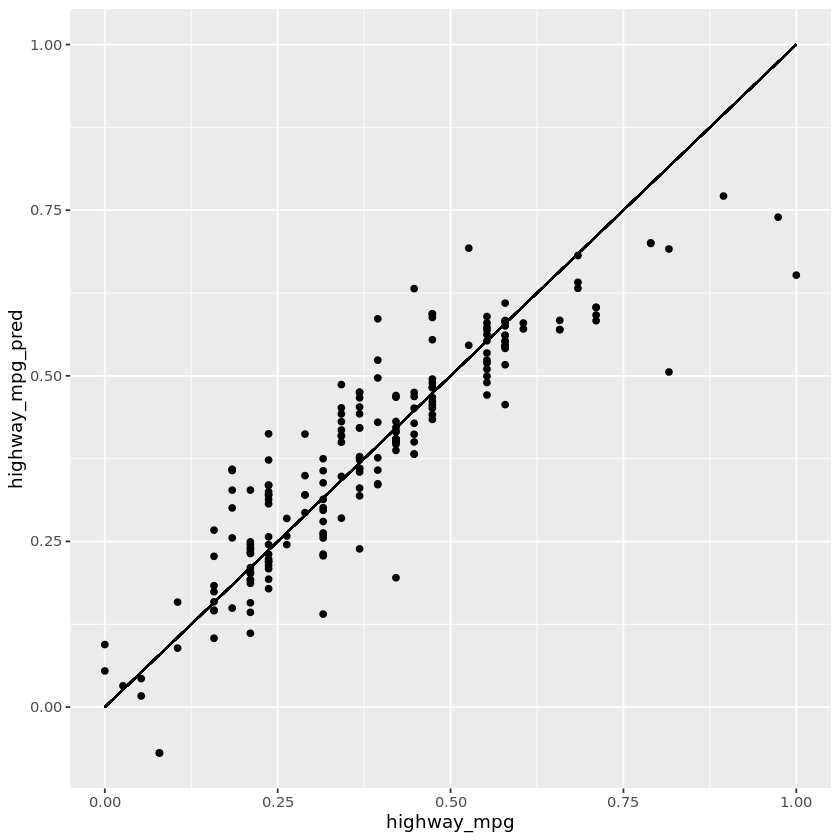

In [1]:
suppressPackageStartupMessages(library(tidyverse))

# 1. Load data.
d <- read_csv("https://raw.githubusercontent.com/varunlobo/PowerBI_Vehicle_dataset_kaggle/refs/heads/main/Automobile_data.csv", show_col_types = FALSE)

# 2. Clean data.
names(d) <- names(d) %>%
  str_replace_all("-","_") %>%
  str_replace_all("[^_A-Za-z0-9]*","") %>%
  str_to_lower()

# 3. Scale data.
scale <- function(a){
  (a - min(a))/(max(a)-min(a))
}

d_num <- d %>% select(where(is.numeric)) %>%
  mutate(across(where(is.numeric), scale))
  
head(d_num,10)

f = highway_mpg ~  wheel_base + length + width + height + curb_weight + engine_size + compression_ratio

m <- lm(f, data=d_num)
summary(m)

dx <- d_num %>%
  mutate(highway_mpg_pred = predict(m, d_num %>% as.data.frame()))
  
ggplot(dx, aes(highway_mpg, highway_mpg_pred)) + geom_point() + geom_segment(aes(x=0,y=0,xend=1,yend=1))

m

#### Issue with Example Above
In the example above, **we fit on all data and then evaluate on that same data.** This is meaningless for prediction.

**Issues:**  
1. The model has already seen every observation.
2. Any apparent accuracy is optimistic (overfitting risk).
3. You have no information about how it generalizes to new data.

For the first time we have to consider the question of a train/test split.

Consider for a moment the ideal model for $y_i$ given $x_i^j$: if there are enough bits in $x_i^j$ to encode each value of $y_i$ given a sufficiently complex model then the best model is just one that memorizes each $x_i^j$ and associates it with $y_i$. **(This is what we did in the example.)** 

#### I thought that was the best model... What's the problem?
Such models (ones that fit and evaluate on the same data) tend to **do poorly on new data drawn** from the same distribution. We want models that can predict well on *new* data. 

In an ideal world we would just fetch more and more data to test with, but we usually don't have that luxury and so we have to set aside some of our (sometimes precious) data set to use as a test set later.

### Example WITH Test/Train
**Here's the general workflow:**
1. Load data.
2. Clean data.
3. Scale data.
4. Split data into testing/training.
5. Fit model on the training data only.
6. Prediction on test data.
7. Predicted vs actual plot.
8. Residual density plot.


Call:
lm(formula = f, data = d_num %>% filter(train))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17629 -0.03655  0.00508  0.03789  0.31851 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.62097    0.02444  25.405  < 2e-16 ***
wheel_base         0.05305    0.08949   0.593  0.55428    
length            -0.07267    0.09507  -0.764  0.44587    
width             -0.01175    0.07889  -0.149  0.88184    
height             0.07774    0.04399   1.767  0.07926 .  
curb_weight       -0.86168    0.09281  -9.284  < 2e-16 ***
engine_size        0.20994    0.07999   2.624  0.00961 ** 
compression_ratio  0.26506    0.02672   9.920  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07722 on 145 degrees of freedom
Multiple R-squared:  0.8076,	Adjusted R-squared:  0.7984 
F-statistic: 86.97 on 7 and 145 DF,  p-value: < 2.2e-16


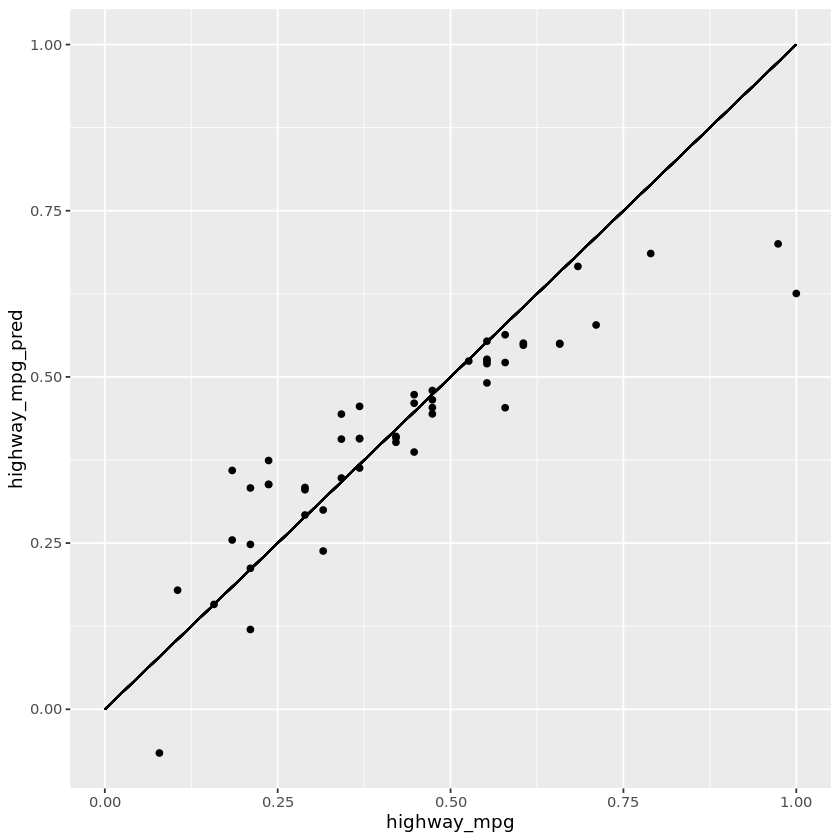


Call:
lm(formula = f, data = d_num %>% filter(train))

Coefficients:
      (Intercept)         wheel_base             length              width  
          0.62097            0.05305           -0.07267           -0.01175  
           height        curb_weight        engine_size  compression_ratio  
          0.07774           -0.86168            0.20994            0.26506  


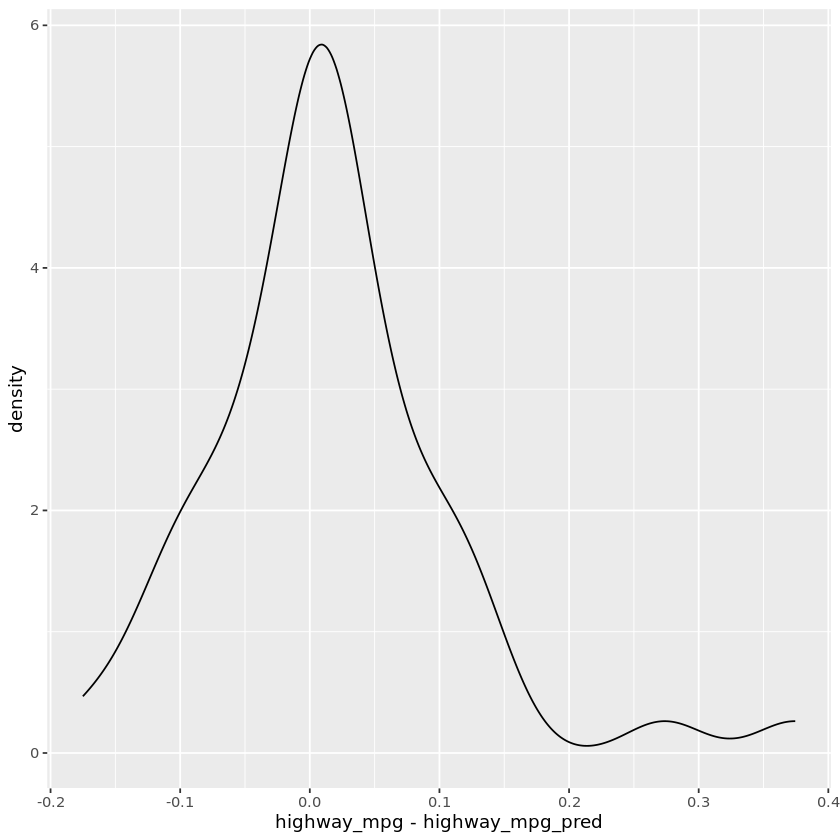

In [2]:
# 1. Load data.
d <- read_csv("https://raw.githubusercontent.com/varunlobo/PowerBI_Vehicle_dataset_kaggle/refs/heads/main/Automobile_data.csv", show_col_types = FALSE)

# 2. Clean data.
names(d) <- names(d) %>%
  str_replace_all("-","_") %>%
  str_replace_all("[^_A-Za-z0-9]*","") %>%
  str_to_lower()

# 3. Scale data.
scale <- function(a){
  (a - min(a))/(max(a)-min(a))
}

d_num <- d %>% select(where(is.numeric)) %>%
  mutate(across(where(is.numeric), scale))

# KEY DIFFERENCE 
# 4. Split data - 75% training and 25% testing.
train <- runif(nrow(d_num)) < 0.75
test <- !train

# 5. Fit model on the training data only.
f = highway_mpg ~  wheel_base + length + width + height + curb_weight + engine_size + compression_ratio

m <- lm(f, data=d_num %>% filter(train))
summary(m)

# 6. Prediction on test data.
dx <- d_num %>% filter(test)

dx <- dx %>% 
  mutate(highway_mpg_pred = predict(m, dx %>% as.data.frame()))

# 7. Predicted vs actual plot.
ggplot(dx, aes(highway_mpg, highway_mpg_pred)) + geom_point() + geom_segment(aes(x=0,y=0,xend=1,yend=1))

# 8. Residual density plot.
ggplot(dx, aes(highway_mpg-highway_mpg_pred)) + geom_density()

m

When you randomly split your dataset into a training and test set, **the split itself is random**. If you did that split again (with a different random seed), you would get a slightly different training/test partition. Because your model is fit on one realization of that random split, the resulting model parameters and errors will also change slightly.  

If we report a single number (the residual error, for example) we are actually understating the uncertainty of our results - there is a distribution of residuals we should really report!  

Set that aside for now. **Just know that at the absolute minimum we need to hold out a test set for testing.**

Let's talk about how we might include non-numerical variables.

## Categorical Columns

We have a lot of data that isn't really numerical but we might still wish to  regress on it.

How do people do this?

### One-Hot Coding
When you have categorical variables, you can’t feed these text labels directly into most regression or machine-learning models, because they expect numeric inputs. **One-hot encoding converts each category into a separate binary (0/1) column.** 

For example, say we have the following data:
| fuel_type |
| :------- |
| gas |
| gas |
| diesel |
| gas |

If we perform one-hot coding, we'll get:
| fuel_type_gas | fuel_type_diesel |
| :------- | :------: |
| 1  | 0 |
| 1  | 0 |
| 0  | 1 |
| 1  | 0 |

#### One-Hot Coding Example

The simplest method is via a *one-hot* encoding:

In [3]:
# 1. Load data.
d <- read_csv("Automobile_data.csv", show_col_types = FALSE)

# 2. Clean data.
names(d) <- names(d) %>%
  str_replace_all("-","_") %>%
  str_replace_all("[^_A-Za-z0-9]*","") %>%
  str_to_lower()

# 3. Scale data.
scale <- function(a){
  (a - min(a))/(max(a)-min(a))
}

# 4. One-hot coding.
one_hot_encode_one <- function(df, col_name){
  unique_values <- df[[col_name]] %>% unique() %>% `[`(2:length(.))
  values <- df[[col_name]]
  df[[col_name]] <- NULL # delete the old column
  for(v in unique_values){
    new_col_name <- sprintf("%s_%s", col_name, v)
    df[[new_col_name]] <- (values == v) %>% as.numeric()
  }
  df
}

 one_hot_encode <- function(df, columns){
  for(col in columns){
    df <- one_hot_encode_one(df, col)
  }
  df
}

wordnum_to_int <- function(x) {
  dict <- c(zero=0, one=1, two=2, three=3, four=4, five=5, six=6,
            seven=7, eight=8, nine=9, ten=10, eleven=11, twelve=12)
  x <- tolower(trimws(as.character(x)))
  as.integer(unname(dict[x]))  # unknowns -> NA
}

# Pipeline
d_clean <-
  d %>%
  dplyr::select(-symboling, -normalized_losses) %>%
  dplyr::mutate(
    price = price %>% as.numeric(),
    bore=bore %>% as.numeric(),
    stroke=stroke %>% as.numeric(),
    peak_rpm=peak_rpm %>% as.numeric(),
    horsepower = horsepower %>% as.numeric()) %>%
  dplyr::mutate(
    dplyr::across(
      dplyr::any_of(c("num_of_doors", "num_of_cylinders")),
      wordnum_to_int
    )
  ) %>%
  one_hot_encode(names(dplyr::select(., where(is.character)))) 

d_clean %>% filter(complete.cases(.)) %>% 
  write_csv("derived_data/mileage_prepped.csv")

Warning message:
“There were 5 warnings in `dplyr::mutate()`.
The first warning was:
ℹ In argument: `price = price %>% as.numeric()`.
Caused by warning in `price %>% as.numeric()`:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 4 remaining warnings.”


Now we can perform a regression on this new one-hot encoded data set.

In [4]:
d <- read_csv("derived_data/mileage_prepped.csv", show_col_types = FALSE) %>%
  select(-city_mpg);
  
f <- highway_mpg ~ . 

m <- lm(f, d)

summary(m)
m


Call:
lm(formula = f, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.2710 -1.0357  0.0000  0.8522  9.9222 

Coefficients: (6 not defined because of singularities)
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           7.149e+01  2.049e+01   3.490 0.000646 ***
num_of_doors          7.486e-02  3.220e-01   0.232 0.816515    
wheel_base           -3.206e-01  1.236e-01  -2.593 0.010520 *  
length               -2.154e-02  6.729e-02  -0.320 0.749366    
width                 3.442e-01  3.071e-01   1.121 0.264289    
height                3.066e-02  1.943e-01   0.158 0.874849    
curb_weight          -8.554e-03  1.947e-03  -4.394 2.17e-05 ***
num_of_cylinders     -1.831e+00  7.984e-01  -2.294 0.023266 *  
engine_size          -2.311e-03  3.247e-02  -0.071 0.943370    
bore                 -1.659e+00  1.955e+00  -0.849 0.397532    
stroke               -6.712e-02  1.204e+00  -0.056 0.955626    
compression_ratio     1.461e+00  5.548e-01   2.63


Call:
lm(formula = f, data = d)

Coefficients:
         (Intercept)          num_of_doors            wheel_base  
           7.149e+01             7.486e-02            -3.206e-01  
              length                 width                height  
          -2.154e-02             3.442e-01             3.066e-02  
         curb_weight      num_of_cylinders           engine_size  
          -8.554e-03            -1.831e+00            -2.311e-03  
                bore                stroke     compression_ratio  
          -1.659e+00            -6.712e-02             1.461e+00  
          horsepower              peak_rpm                 price  
          -9.034e-03            -3.220e-03             2.655e-04  
           make_audi              make_bmw        make_chevrolet  
           2.302e+00             3.912e+00             1.032e+01  
          make_dodge            make_honda            make_isuzu  
           6.203e+00             1.972e+00             1.267e+00  
         make_

A natural question is: **How many of these predictors do we really need if we want to have a good model?**

## Parsimoniousness

Simple explanations are considered better than complicated ones. Part of the reason for that is that complex explanations can be totally uninformative: we may summarize a data set with the data set itself, for example, and doing so gives us nothing.

This has practical implications.

I've had to implement a linear regression right into an sql query:

``` sql
WITH t AS (SELECT * FROM your_table)
SELECT
  t.*,
  (
    7.149e+01
    + 7.486e-02 * num_of_doors
    - 3.206e-01 * wheel_base
    - 2.154e-02 * length
    + 3.442e-01 * width
    + 3.066e-02 * height
    - 8.554e-03 * curb_weight
    - 1.831e+00 * num_of_cylinders
    - 2.311e-03 * engine_size
    - 1.659e+00 * bore
    - 6.712e-02 * stroke
    + 1.461e+00 * compression_ratio
    - 9.034e-03 * horsepower
    - 3.220e-03 * peak_rpm
    + 2.655e-04 * price
    + 2.302e+00 * make_audi
    + 3.912e+00 * make_bmw
    + 1.032e+01 * make_chevrolet
    + 6.203e+00 * make_dodge
    + 1.972e+00 * make_honda
    + 1.267e+00 * make_isuzu
    + 7.941e+00 * make_jaguar
    + 3.672e+00 * make_mazda
    + 4.149e+00 * "make_mercedes-benz"
    + 5.813e+00 * make_mercury
    + 6.102e+00 * make_mitsubishi
    + 5.237e+00 * make_nissan
    + 4.031e+00 * make_peugot
    + 6.608e+00 * make_plymouth
    + 3.247e-01 * make_porsche
    -- make_renault: NA coefficient -> excluded
    + 2.907e+00 * make_saab
    + 1.555e+00 * make_subaru
    + 4.980e+00 * make_toyota
    + 4.441e+00 * make_volkswagen
    + 6.438e+00 * make_volvo
    - 1.260e+01 * fuel_type_diesel
    - 2.519e+00 * aspiration_turbo
    + 2.531e+00 * body_style_hatchback
    + 2.970e+00 * body_style_sedan
    + 3.262e+00 * body_style_wagon
    + 1.289e+00 * body_style_hardtop
    + 4.622e-01 * drive_wheels_fwd
    - 1.322e+00 * drive_wheels_4wd
    - 8.917e-02 * engine_location_rear
    + 1.354e-01 * engine_type_ohcv
    - 1.149e+00 * engine_type_ohc
    + 1.707e+00 * engine_type_l
    -- engine_type_rotor/ohcf/dohcv: NA coefficients -> excluded
    + 3.418e-01 * fuel_system_2bbl
    - 1.344e+00 * fuel_system_mfi
    + 4.681e+00 * fuel_system_1bbl
    + 2.622e+00 * fuel_system_spfi
    -- fuel_system_4bbl/idi: NA coefficients -> excluded
    - 2.868e-01 * fuel_system_spdi
  ) AS predicted_mpg
FROM t;

```
*Note: You don't need to know how to do this. This is a visualization of a model with a ton of features to show how complex it becomes when we don't restrict things.*

This is too complex! **It would be nice if we could somehow automatically restrict our regressions to just the most important variables.** Maybe we even want to accept some decrease in accuracy or interpretability in exchange for simplicity.

This is the question of **feature selection**, which we will discuss later. For now let's learn how we can use this framework of regression to classify rather than regress.

## Classification Vs Regression

Recall that when we perform a regular regression we calculate:

$$
\hat{y_i} = \beta^{j}x_{ij}
$$

that is to say, we estimate a $\hat{y}$ function by finding the $\beta_j$ that minimizes the sum of squared errors (SSE) via

$$
min_{\beta_j}{}(y_i - \hat{y_i})^2
$$

*Note:* This is called **ordinary least squares (OLS) regression**.

To implement this, we can invoke an **optimization function**. The function `estimate_betas()` is just an implementation of minimizing SSE using numerical optimization:

In [5]:
estimate_betas <- function(X, y) {
  # X: matrix of predictors with first column of 1's for intercept
  # y: response vector
  
  # initial guess for coefficients
  init <- rep(0, ncol(X))
  
  # objective: sum of squared residuals
  sse <- function(beta) {
    sum((y - X %*% beta)^2)
  }
  
  # use built-in optimizer
  opt <- optim(par = init, fn = sse)
  
  opt$par  # estimated coefficients
}

The above is just farming out all the hard work to the `optim` function:

In [6]:
# Remove the "#" below to print this if you'd like.
# print(tools::Rd2txt(utils:::.getHelpFile(help("optim"))))

But another, deeper perspective presents itself as useful here.

Instead of minimizing the difference between the estimated and true $y_i$ we can think of a **linear regression** as **calculating a parameterized normal distribution for $y$ at a given $x$ under the assumption that the other parameters of the distribution are the same at all $x$ positions**. 

The residual of the fit gives us the parameters of that normal distribution.

Simply put, OLS ⇔ Maximum Likelihood Estimation assuming $y_i ∼ N(x_i^T β,σ^2)$.

This perspective is useful because we can then imagine variations on regressions that calculate other kinds of distributions. Let's motivate this a bit on the way to the so-called "logistic" regression, which creates a classifier. 

## Motivating the Logistic Regression

**A classifier is a model that assigns inputs to categories (classes) instead of predicting numeric values.**  

The primary challenge with using the framework of linear regression to estimate a classifier is that our target variable's support is the set {0,1} where 0 means one category and 1 means the other (we restrict ourselves to two categories for the moment).

### Palmer Penguins Example
For example, we can use the fun palmer penguins package:

In [7]:
library(palmerpenguins)
data(package = 'palmerpenguins')
print(penguins)

# A tibble: 344 × 8
   species island    bill_length_mm bill_depth_mm flipper_length_mm body_mass_g
   <fct>   <fct>              <dbl>         <dbl>             <int>       <int>
 1 Adelie  Torgersen           39.1          18.7               181        3750
 2 Adelie  Torgersen           39.5          17.4               186        3800
 3 Adelie  Torgersen           40.3          18                 195        3250
 4 Adelie  Torgersen           NA            NA                  NA          NA
 5 Adelie  Torgersen           36.7          19.3               193        3450
 6 Adelie  Torgersen           39.3          20.6               190        3650
 7 Adelie  Torgersen           38.9          17.8               181        3625
 8 Adelie  Torgersen           39.2          19.6               195        4675
 9 Adelie  Torgersen           34.1          18.1               193        3475
10 Adelie  Torgersen           42            20.2               190        4250
# ℹ 334 more rows
# 

Package,Item,Title
<chr>,<chr>,<chr>
palmerpenguins,penguins,"Size measurements for adult foraging penguins near Palmer Station, Antarctica"
palmerpenguins,penguins_raw (penguins),"Penguin size, clutch, and blood isotope data for foraging adults near Palmer Station, Antarctica"


#### Building a Classifier
To build a classifier that **predicts whether a penguin is of the species Adelie or not**:

In [8]:
data(package = 'palmerpenguins')

# Scaling function
scale <- function(x){
    (x-min(x))/(max(x)-min(x))
}

# Classifier
d <- penguins %>% as_tibble() %>% filter(complete.cases(.)) %>%
  transmute(is_adelie = 1*(species == "Adelie"), # Here is the classifier for Adelie.
            bill_length = bill_length_mm %>% scale(),          # Applying scaling function.
            bill_depth = bill_depth_mm %>% scale(),            # Applying scaling function.
            flipper_length = flipper_length_mm %>% scale(),    # Applying scaling function.
            body_mass = body_mass_g %>% scale(),               # Applying scaling function.
            is_male = 1*(sex == "male")) # Here is the classifier for sex (= male).
print(d)      

# A tibble: 333 × 6
   is_adelie bill_length bill_depth flipper_length body_mass is_male
       <dbl>       <dbl>      <dbl>          <dbl>     <dbl>   <dbl>
 1         1      0.255       0.667          0.153     0.292       1
 2         1      0.269       0.512          0.237     0.306       0
 3         1      0.298       0.583          0.390     0.153       0
 4         1      0.167       0.738          0.356     0.208       0
 5         1      0.262       0.893          0.305     0.264       1
 6         1      0.247       0.560          0.153     0.257       0
 7         1      0.258       0.774          0.390     0.549       1
 8         1      0.327       0.536          0.169     0.139       0
 9         1      0.236       0.964          0.322     0.306       1
10         1      0.0909      0.952          0.441     0.472       1
# ℹ 323 more rows


Package,Item,Title
<chr>,<chr>,<chr>
palmerpenguins,penguins,"Size measurements for adult foraging penguins near Palmer Station, Antarctica"
palmerpenguins,penguins_raw (penguins),"Penguin size, clutch, and blood isotope data for foraging adults near Palmer Station, Antarctica"


We can't do linear regression with a classification because **our target variable (is_adelie) is not normally distributed for a given combination of independent variables.** Treating the target variable as “probability” directly doesn’t work because the linear function is unbounded.  

Thus, we need a function which maps the domain [0,1] to the real line. One such function is the logit function:

$$
logit(p) = log(\frac{p}{1-p})
$$

The behavior of the log function combined with the fraction here makes it so that
when p == 1 we have logit(1) = $\infty$ and when p == 0 logit(0) = $-\infty$.

How can we integrate this into our regression? Well, recall:

$$
\hat{y_i} = \beta_j x_i^j
$$

We want to estimate the probability $P(y=1|x)$ so we can write:

$$
logit(P(y_i=1|x_i)) = \beta_j x_i^j
$$

Now, $\beta_j x_i^j$ is well behaved, so the linear model can safely predict any real number. However, we cannot think of this as just a simple optimization problem anymore because we cannot calculate the log odds for each data point alone ($logit(0) = -\infty$,  $logit(1) = \infty$).  

We can’t convert $0$ or $1$ directly to log-odds; we estimate probabilities first and use those to fit the model. We are maximizing the likelihood of drawing the $y_i$
from a parameterized Bernoulli distribution where we get the parameter $p_i$ by inverting the link function:

$$
p_i = \frac{1}{1 + e^{\beta_i^j x_j}}
$$

Given an estimate for all the $p_i$ for our data set we can write the likelihood
of our $y_i$ like this:

$$
L(\beta_\mu) 
= \prod_{i=1}^n 
\left[ \left( \frac{1}{1 + e^{-\beta_\nu x_i^\nu}} \right)^{y_i}
\left( 1 - \frac{1}{1 + e^{-\beta_\nu x_i^\nu}} \right)^{1 - y_i} \right]
$$

Thus if we maximize the likelihood over $\beta_j$ in the above expression we
can find the parameters we need. Maximizing the likelihood is outside the scope
of the course, but in a pinch you could do it with `optim`. We do not have to do so.

The critical idea here is that we are estimating the parameters of a *different* probability distribution in terms of a linear combination of the explanatory variables. **In a regular regression that distribution is the normal distribution, but here it is the Bernoulli.**

Let's do an example.

### An Example Logistic Regression

In [9]:
data(package = 'palmerpenguins')

scale <- function(x){
  (x - min(x)) / (max(x) - min(x))
}

d <- penguins %>% as_tibble() %>% filter(complete.cases(.)) %>%
  transmute(
    is_adelie       = 1 * (species == "Adelie"),
    bill_length     = bill_length_mm     %>% scale(),
    bill_depth      = bill_depth_mm      %>% scale(),
    flipper_length  = flipper_length_mm  %>% scale(),
    body_mass       = body_mass_g        %>% scale()
  )

d

set.seed(2025)
n <- nrow(d)
train_idx <- sample.int(n, size = floor(0.1 * n))
d_train <- d %>% slice(train_idx)
d_test  <- d %>% slice(setdiff(seq_len(n), train_idx))

d_train %>% write_csv("derived_data/penguins_train.csv")
d_test  %>% write_csv("derived_data/penguins_test.csv")

f <- is_adelie ~ .
m <- glm(f, data = d_train, family = binomial())

summary(m)

saveRDS(m, "derived_data/adelie_logres.rds")

is_adelie,bill_length,bill_depth,flipper_length,body_mass
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.25454545,0.6666667,0.15254237,0.2916667
1,0.26909091,0.5119048,0.23728814,0.3055556
1,0.29818182,0.5833333,0.38983051,0.1527778
1,0.16727273,0.7380952,0.35593220,0.2083333
1,0.26181818,0.8928571,0.30508475,0.2638889
1,0.24727273,0.5595238,0.15254237,0.2569444
1,0.25818182,0.7738095,0.38983051,0.5486111
1,0.32727273,0.5357143,0.16949153,0.1388889
1,0.23636364,0.9642857,0.32203390,0.3055556


Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = f, family = binomial(), data = d_train)

Coefficients:
                Estimate Std. Error z value Pr(>|z|)
(Intercept)        65.96  320866.04   0.000        1
bill_length      -287.70  549377.36  -0.001        1
bill_depth        109.79  458761.23   0.000        1
flipper_length   -120.90  613023.01   0.000        1
body_mass         138.47  402606.60   0.000        1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4.5475e+01  on 32  degrees of freedom
Residual deviance: 9.2074e-10  on 28  degrees of freedom
AIC: 10

Number of Fisher Scoring iterations: 25


Package,Item,Title
<chr>,<chr>,<chr>
palmerpenguins,penguins,"Size measurements for adult foraging penguins near Palmer Station, Antarctica"
palmerpenguins,penguins_raw (penguins),"Penguin size, clutch, and blood isotope data for foraging adults near Palmer Station, Antarctica"


## Characterizing Classifications

The natural thing to do when reporting how well a classification works is to report the "accuracy," which is just the number of times the classifier is "right" on the held out data set.

In [10]:
d_test <- read_csv("derived_data/penguins_test.csv", show_col_types = FALSE)
m <- readRDS("derived_data/adelie_logres.rds")

p <- predict(m, newdata = d_test, type = "response")
pred <- as.integer(p >= 0.5)
truth <- d_test$is_adelie

tp <- sum(pred == 1 & truth == 1)
fp <- sum(pred == 1 & truth == 0)
tn <- sum(pred == 0 & truth == 0)
fn <- sum(pred == 0 & truth == 1)
acc <- (tp + tn) / (tp + fp + tn + fn)

df <- tibble(
  measure = c("True Positive", "False Positive", "True Negative", "False Negative", "Accuracy"),
  value   = c(tp, fp, tn, fn, acc)
)

df

measure,value
<chr>,<dbl>
True Positive,130.0000000
False Positive,4.0000000
True Negative,165.0000000
False Negative,1.0000000
Accuracy,0.9833333


It may not be obvious that we care about the values other than the accuracy, but, in fact, which type of error we care about depends a lot on the cost of making different kinds of mistakes.

If we imagine that Adelie penguins in particular carry a deadly disease which
we have to prevent from entering a country at customs then we might want to 
bias the classifier towards avoiding false negatives. We can do that 
by adjusting the threshold probability. 

measure,value,threshold
<chr>,<dbl>,<dbl>
True Positive,130.0000000,0.5
False Positive,4.0000000,0.5
True Negative,165.0000000,0.5
False Negative,1.0000000,0.5
Accuracy,0.9833333,0.5


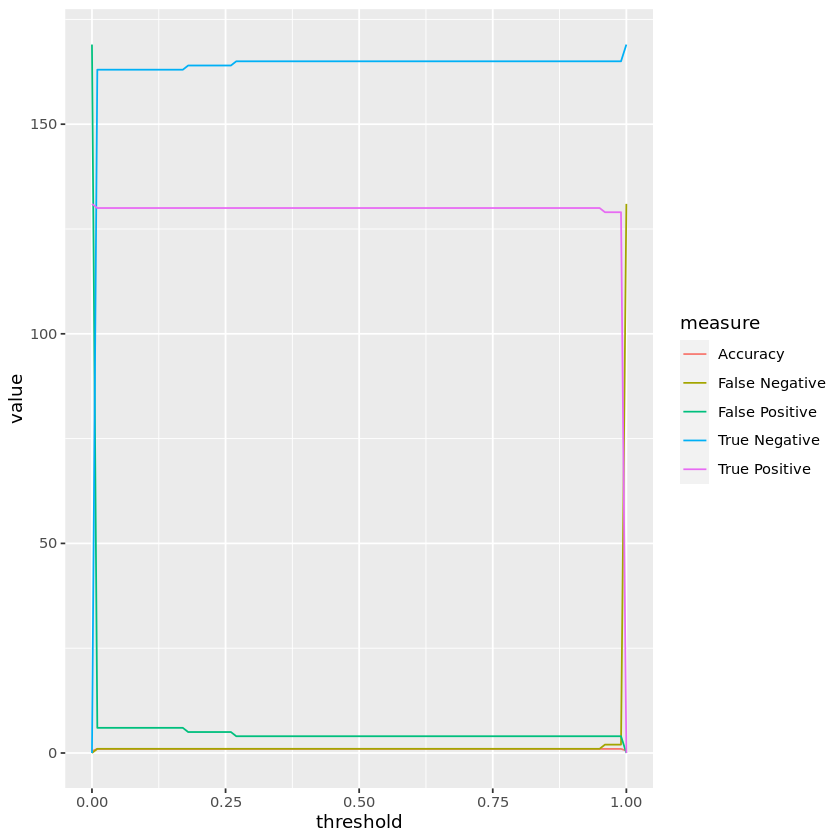

In [11]:
evaluate_model <- function(model, data, threshold = 0.5) {
  p <- predict(model, newdata = data, type = "response")
  pred <- as.integer(p >= threshold)
  truth <- data$is_adelie
  
  tp <- sum(pred == 1 & truth == 1)
  fp <- sum(pred == 1 & truth == 0)
  tn <- sum(pred == 0 & truth == 0)
  fn <- sum(pred == 0 & truth == 1)
  acc <- (tp + tn) / (tp + fp + tn + fn)
  
  tibble(
    measure = c("True Positive", "False Positive", "True Negative", "False Negative", "Accuracy"),
    value   = c(tp, fp, tn, fn, acc),
    threshold = threshold
  )
}

d_test <- read_csv("derived_data/penguins_test.csv", show_col_types = FALSE)
m <- readRDS("derived_data/adelie_logres.rds")

df <- evaluate_model(m, d_test, threshold = 0.5)
df

df <- tibble()
for(i in (0:100)/100){
    df <- rbind(df, 
      evaluate_model(m, d_test, i))
}

ggplot(df, aes(threshold, value)) + geom_line(aes(group=measure,color=measure))

write_csv(df, "derived_data/over_threshold.csv")

According to the above, if our goal is to produce a classifier than NEVER misses
an Adelie penguin, we are going to have a lot of trouble! We might need to 
go back to the drawing board.

In an ideal situation we would know the cost associated with each type of error
and the profit associated with each type of successful prediction and we would
choose a threshold based on maximizing the value of the classifier. Unfortunately
we rarely have concrete information and so there are other methods of
characterizing the utility of a classifier which serve as useful shorthands.

The key idea is coming up with a measure that is independent of the threshold.

## F Scores and ROC Curves

The main way people do this is by reporting so-called F scores (the most common of which is the F1 score) and by showing ROC curves and giving the area under the ROC curve, which has a clear meaning. 

The ROC curve, which **plots the false positive rate vs. the true positive rate**, is the less confusing and more useful of the two methods. 

False Positive Rate,True Positive Rate,threshold
<dbl>,<dbl>,<dbl>
1.00000000,1.0000000,0.00
0.03550296,0.9923664,0.01
0.03550296,0.9923664,0.02
0.03550296,0.9923664,0.03
0.03550296,0.9923664,0.04
0.03550296,0.9923664,0.05
0.03550296,0.9923664,0.06
0.03550296,0.9923664,0.07
0.03550296,0.9923664,0.08


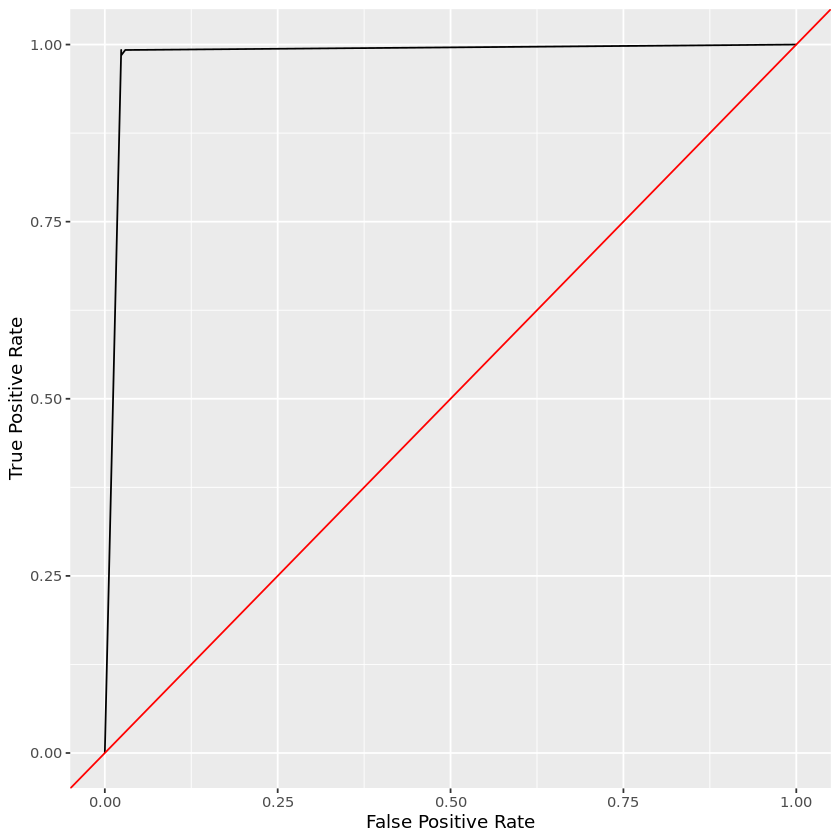

In [12]:
df <- read_csv("derived_data/over_threshold.csv", show_col_types = FALSE) %>% arrange(threshold) %>%
   pivot_wider(names_from="measure", values_from="value") %>%
   transmute(`False Positive Rate`=`False Positive`/(`False Positive` + `True Negative`),
             `True Positive Rate` = `True Positive`/(`True Positive` + `False Negative`),
             threshold=threshold) %>% arrange(threshold)

df
ggplot(df, aes(`False Positive Rate`, `True Positive Rate`)) + geom_line() + geom_abline(slope=1, intercept=0,color="red")

This problem is too easy and so it's hard to get a sense for what this should look like if we have a not-so-good-classifier.

If our classifier was terrible, then the true positive rate would be roughly speaking equal to the one minus the threshold and our false positive rate would be equal to the threshold.

**A perfect classifier looks like a rectangle and a perfectly bad classifier looks like the line y=x.**

Thus, we can get a threshold-free measure of the quality of our classifier by
taking the area under the curve minus 1/2 times 2. This would vary from 0 for a bad classifier to 1 for a perfect one.

Typically people give the area under curve without this normalization and we just understand an AUC of 1/2 is bad. 

Now let's describe the F1 score. 

## F1 Scores

Sometimes it's appropriate to think of a classifier as performing a retrieval task - you search a pile of objects for a particular type and then you get some objects back. 

From this point of view you can define a few quantities:

1. $\text{precision} = \frac{\text{true positives}}{\text{true positives + false positives}}$
2. $\text{recall} = \frac{\text{true positives}}{\text{true positives + false negatives}}$

Using these two measurements we can calculate the f1 score, which looks a little funny:

$$
f_1 = 2 \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}}
$$

What does this mean intuitively? Well, it's the [harmonic mean](https://en.wikipedia.org/wiki/Harmonic_mean#Harmonic_mean_of_two_numbers) of the precision
and the recall. 

The key justification for this measure is that if these two quantities are very out of balance the above expression penalizes the f1 score. This means that we want to treat these two measures of utility as being equally important.

Now let's turn our attention to the question of variable selection for these  linear style models. 

## Parsimoniousness Again
We want our model to predict well using as few parameters as possible. 

Recall:

$$
\hat{y_i} = \beta_i^j x_j
$$

We choose $\beta_j$ by varying the $\beta_j$ in such a way that we minimize SSE

$$
(\hat{y_i}-y_i)^2
$$

Which we could expand out to look like this:

$$
(\beta_i^j x_j - y_i)^2
$$

Suppose we wanted to impose a parsimoniousness (**encourage the model to be as simple as possible while still explaining the data**) onto our model. Consider that if a given $\beta_i$ for a specific $i$ is 0, that amounts to setting that parameter to 0.

So a parsimonious model might be one where something like the following is true:

$$
\beta_j \beta^j \text{ is small }
$$

Or, in regular notation, for clarity:

$$
\sum_j{\beta_j^2} \text { is small }
$$

Here we square $\beta_j$ because we don't care about the *sign* of the $\beta_j$ - we just want it to be small. What if we added this as a penalty term to our optimization problem like this:

$$
\min_{\beta_j} ((\beta_i^j x_j-y_i)^2 + \alpha \beta_j \beta^j)
$$

This would penalize our optimization objective function if our $\beta_j$ started to get big. This is the idea of a penalized regression, of which there are at least two types.

What may not be obvious is that the funny behavior of the so-called "LASSO" regression.

$$
\min_{\beta_j} ((\beta_i^j x_j-y_i)^2 + \alpha \sum_{j=1}^{n}{abs(\beta_j)} )
$$

which has the quality of breaking the rotational symmetry of the squared penalty term, has some desirable properties: **it tends to force coefficients to zero one at a time rather than just constraining the total coefficient sum**. Why? If you are forced to walk along a grid between two arbitrary points and you measure the difference in x coordinate and y coordinate as a function of time one of them will hit zero before the other. **This effectively removes them from the model and results in a more interpretable equation.** 

This has the benefit of performing variable selection "automatically," although we shall see this is fraught with peril.

Ok, so how do we do this? We use the `glmnet` library.

## Lasso and Ridge

Typically we perform a ridge or lasso regression using glmnet - a library for doing "elastic net" regressions (these are just between ridge and lasso regression, essentially).

The API for glmnet is a little different than for lm/glm - we split the  data set into the response and the model matrix (the independent variables).

Then we typically perform *multiple* regressions as we scale penalty terms and measure the coefficients, error, etc. 

In [13]:
suppressPackageStartupMessages(library(glmnet))
suppressPackageStartupMessages(library(broom))
suppressPackageStartupMessages(library(gridExtra))

# Load data
d <- read_csv("derived_data/mileage_prepped.csv", show_col_types=FALSE) %>%
  select(-city_mpg)

# Response and predictor matrices
y <- d$highway_mpg
X <- model.matrix(highway_mpg ~ ., d)[, -1]   # remove intercept column

# Fit cross-validated LASSO
cvfit <- cv.glmnet(X, y, alpha = 1)
fit <- cvfit$glmnet.fit

best_fit <- glmnet(X,y,lambda=cvfit$lambda.min)
best_fit$beta

57 x 1 sparse Matrix of class "dgCMatrix"
                                s0
num_of_doors          .           
wheel_base            .           
length               -0.0611626537
width                 .           
height                .           
curb_weight          -0.0068049898
num_of_cylinders      .           
engine_size           .           
bore                  .           
stroke                .           
compression_ratio     0.4824815241
horsepower           -0.0401050691
peak_rpm             -0.0006035641
price                 .           
make_audi            -1.8196358445
make_bmw              .           
make_chevrolet        5.5935555428
make_dodge            .           
make_honda            .           
make_isuzu           -0.9823120788
make_jaguar           2.0066088916
make_mazda            .           
`make_mercedes-benz` -0.4476900242
make_mercury          .           
make_mitsubishi       .           
make_nissan           0.1757067898
make_peugot  

This is the final result, and sure enough, we've got a sparse array of predictors. But we can learn a lot more about how this works by making a few more figures.

First, let's examine how the coefficients vary as a function of lambda. As
you can see, they are all gradually pushed to 0. 


``` sidebar
A sparse array is one where memory is only allocated for elements with
non-zero values, which turns out to cover a surprisingly large number of
cases an can save large amounts of memory.
```

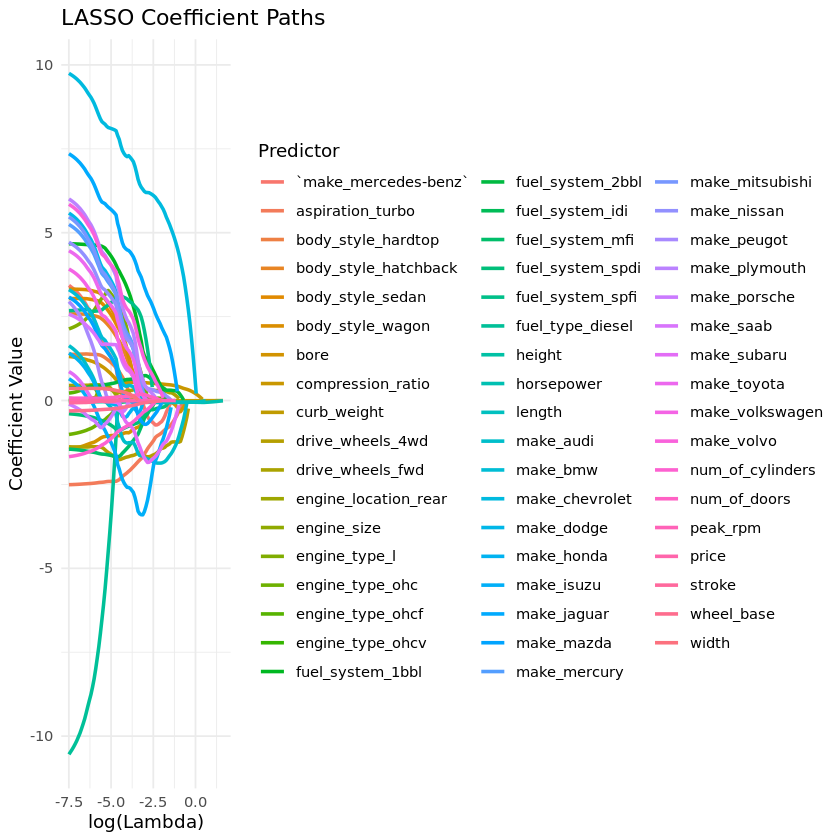

In [14]:
coef_df <- broom::tidy(fit) %>%
  filter(term != "(Intercept)") %>%
  mutate(log_lambda = log(lambda))

nz_df <- coef_df %>%
  group_by(lambda) %>%
  summarize(nonzero = sum(estimate != 0)) %>%
  mutate(log_lambda = log(lambda))

# Cross-validation curve (error vs lambda)
cv_df <- tibble(
  lambda = cvfit$lambda,
  cvm = cvfit$cvm,
  cvsd = cvfit$cvsd
) %>%
  mutate(log_lambda = log(lambda))

err_df <- left_join(cv_df, nz_df, by = "lambda")

# Plot 1: Coefficient paths
p1 <- ggplot(coef_df, aes(x = log_lambda, y = estimate, color = term)) +
  geom_line(linewidth = 1) +
  labs(
    title = "LASSO Coefficient Paths",
    x = "log(Lambda)",
    y = "Coefficient Value",
    color = "Predictor"
  ) +
  theme_minimal() +
  theme(legend.position = "right")

p1

Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


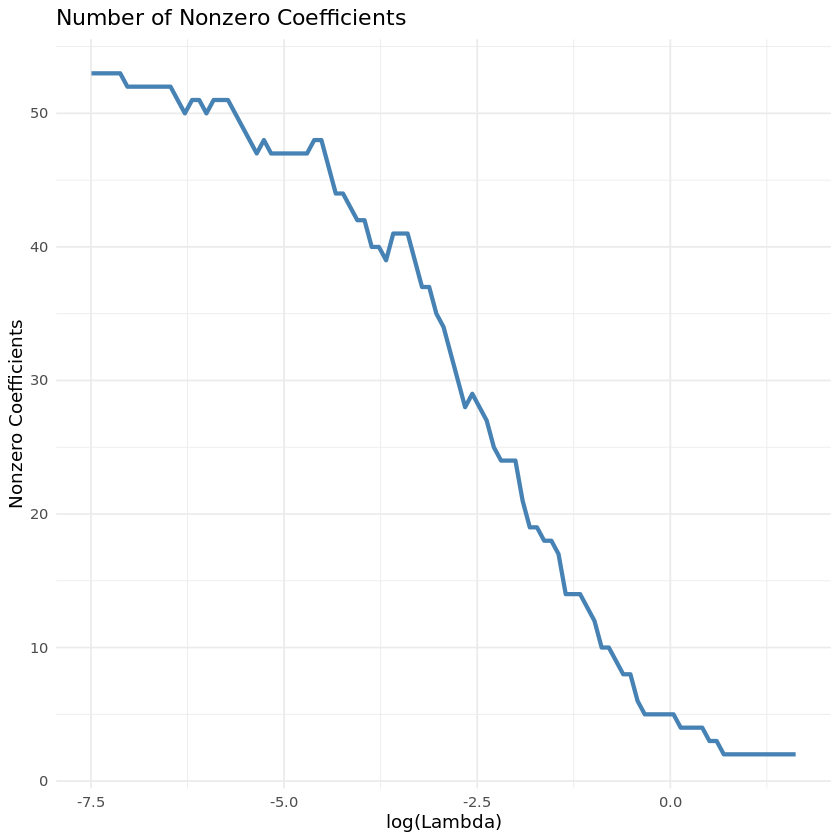

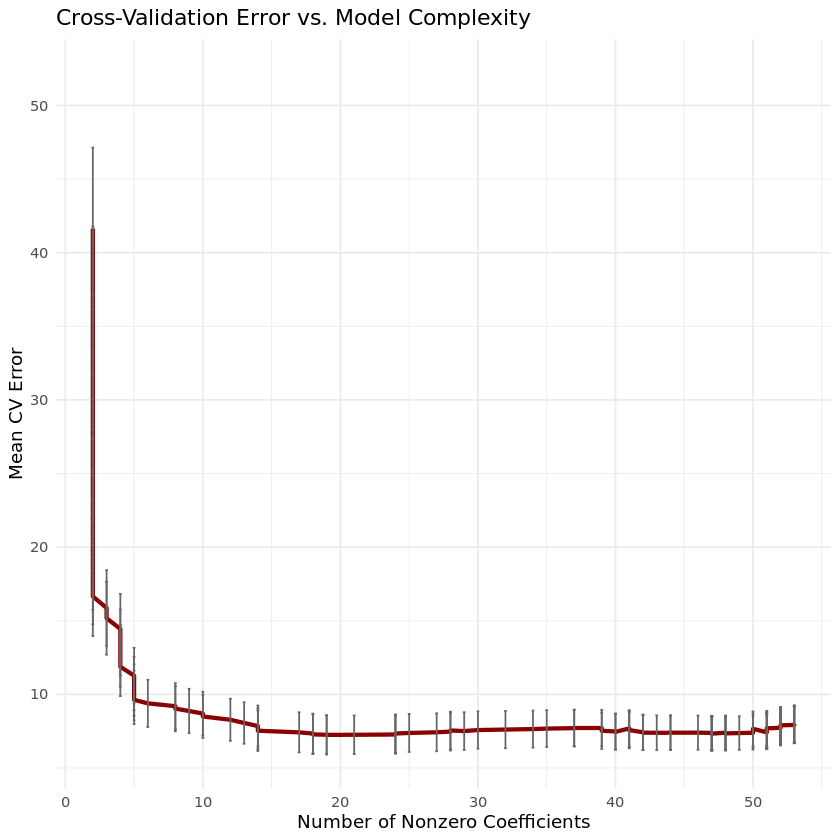

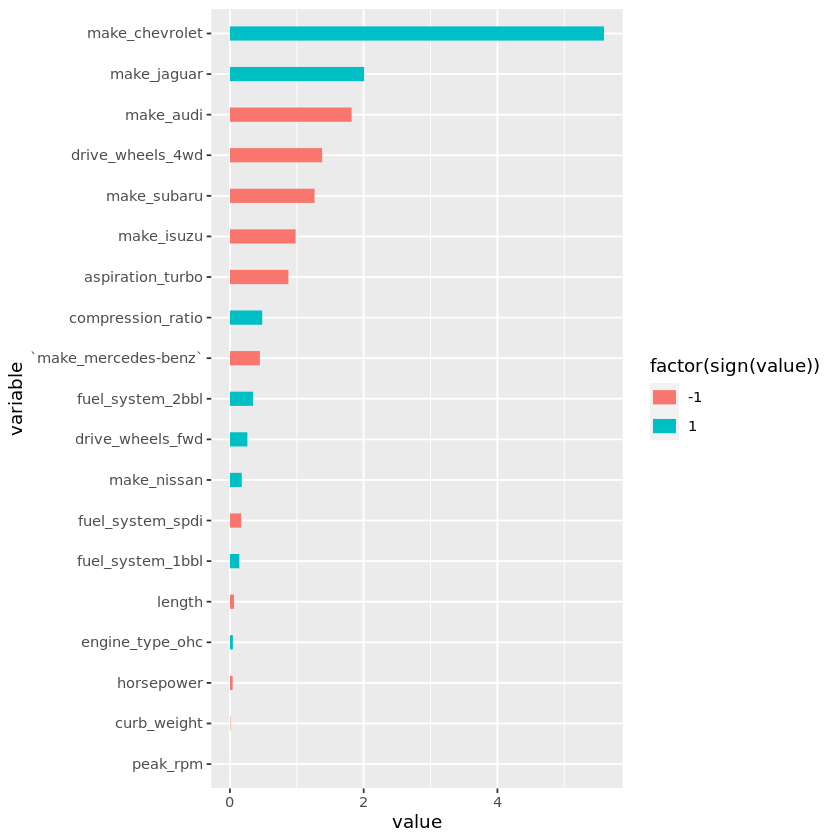

In [15]:
p2 <- ggplot(nz_df, aes(x = log_lambda, y = nonzero)) +
  geom_line(linewidth = 1.2, color = "steelblue") +
  labs(
    title = "Number of Nonzero Coefficients",
    x = "log(Lambda)",
    y = "Nonzero Coefficients"
  ) +
  theme_minimal()
p2

p3 <- ggplot(err_df, aes(x = nonzero, y = cvm)) +
  geom_line(linewidth = 1.2, color = "darkred") +
  geom_errorbar(aes(ymin = cvm - cvsd, ymax = cvm + cvsd), width = 0.2, color = "gray40") +
  labs(
    title = "Cross-Validation Error vs. Model Complexity",
    x = "Number of Nonzero Coefficients",
    y = "Mean CV Error"
  ) +
  theme_minimal()
p3

# Combine all three plots - Not running because it jumbles them together!
# gridExtra::grid.arrange(p1, p2, p3, ncol = 1)

beta_df <- tibble(variable=rownames(best_fit$beta), value = best_fit$beta %>% as.vector()) %>%
  arrange((abs(value))) %>%
  mutate(variable=factor(variable, variable)) %>%
  filter(abs(value)>0.0) 

p <- ggplot(beta_df, aes(value, variable)) +
  geom_segment(aes(x=0,y=variable,xend=abs(value),yend=variable,color=factor(sign(value))),linewidth=4)

p

```sidebar
The curious reader might wonder: we know that doing a regression, in general, involves a minimization procedure at some point and that these depend on certain random initial conditions: how does glmnet make sure that the coefficients vary in a stable way as lambda increases? It uses the previous values as the initial conditions for the next regression. This probably also makes the whole process more efficient.
```


Note that the above plot shows us that there is a (very shallow) point where the error is smallest. We can pick out the that fit as the "best".

Weird!

Here we see that `make_chevrolet` is the most powerful explanatory variable,
which surprises us, because we expected it to be `curb_weight`. How should we think about this?

## Correlated Independent Variables

In [16]:
read_csv("Automobile_data.csv", show_col_types = FALSE) %>%
     group_by(make) %>% 
     summarize(avg_curb_weight=mean(`curb-weight`)) %>%
     arrange(desc(avg_curb_weight))

make,avg_curb_weight
<chr>,<dbl>
jaguar,4027.333
mercedes-benz,3696.250
peugot,3221.000
volvo,3037.909
bmw,2929.375
mercury,2910.000
porsche,2891.200
audi,2800.714
saab,2745.500


We can see that when the make is `chevy` we have the lowest weight. In general, what we will find is that our `curb_weight`  is correlated with many of these high explanatory variables.

num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,⋯,engine_type_ohcf,engine_type_dohcv,fuel_system_2bbl,fuel_system_mfi,fuel_system_1bbl,fuel_system_spfi,fuel_system_4bbl,fuel_system_idi,fuel_system_spdi,variable
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1.000000000,0.447459545,0.400636045,0.235345180,0.52379853,0.209849450,-0.051492423,-0.003018776,0.127156267,-0.008420884,⋯,0.011581577,NA,-0.003119805,-0.084862513,-0.10793798,-0.084862513,NA,0.175294499,-0.160475485,num_of_doors
0.447459545,1.000000000,0.879306884,0.818465322,0.59123908,0.782172514,0.339445233,0.568374887,0.495957478,0.174224712,⋯,-0.193190856,NA,-0.413085363,-0.035562329,-0.19981304,-0.034386262,NA,0.310195769,-0.124599301,wheel_base
0.400636045,0.879306884,1.000000000,0.857367846,0.49105029,0.882694059,0.447884969,0.686997642,0.606372548,0.121888488,⋯,-0.127341937,NA,-0.491461194,-0.006531517,-0.30902080,-0.010010586,NA,0.209881872,-0.086355384,length
0.235345180,0.818465322,0.857367846,1.000000000,0.31064047,0.867639655,0.546949789,0.739903304,0.541633421,0.188733034,⋯,-0.127128579,NA,-0.524420442,0.013748966,-0.19948273,-0.023481971,NA,0.245662312,-0.046606589,width
0.523798527,0.591239085,0.491050293,0.310640467,1.00000000,0.305837472,-0.080062491,0.026905716,0.182444626,-0.054338080,⋯,-0.066837708,NA,-0.112319182,-0.110885170,-0.05211261,-0.074627927,NA,0.274296139,-0.306888382,height
0.209849450,0.782172514,0.882694059,0.867639655,0.30583747,1.000000000,0.624581081,0.857188210,0.645070339,0.175348601,⋯,-0.085305242,NA,-0.581681586,0.034274498,-0.24150151,0.023696468,NA,0.227254683,-0.004985047,curb_weight
-0.051492423,0.339445233,0.447884969,0.546949789,-0.08006249,0.624581081,1.000000000,0.847676331,0.215092305,0.024729083,⋯,-0.005600631,NA,-0.300450488,-0.029679195,-0.10110285,-0.029679195,NA,-0.033642733,-0.090952592,num_of_cylinders
-0.003018776,0.568374887,0.686997642,0.739903304,0.02690572,0.857188210,0.847676331,1.000000000,0.581853903,0.214517905,⋯,-0.025596254,NA,-0.468256772,0.048496316,-0.18230202,-0.015873980,NA,0.066090947,-0.001847751,engine_size
0.127156267,0.495957478,0.606372548,0.541633421,0.18244463,0.645070339,0.215092305,0.581853903,1.000000000,-0.065038437,⋯,0.334849750,NA,-0.348376346,0.071557871,-0.30082877,0.026398922,NA,0.052377699,-0.005028724,bore


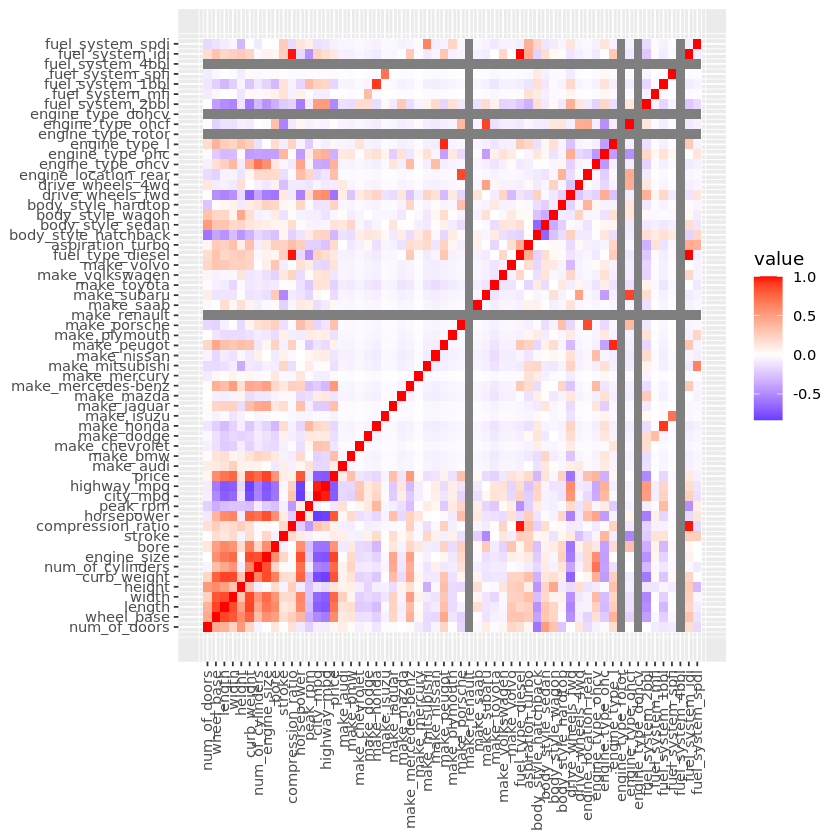

In [17]:
d <- read_csv("derived_data/mileage_prepped.csv", show_col_types = FALSE) %>%
     mutate(across(everything(), function(x){
       m <- mean(x);
       sd <- sd(x);
       (x-m)/sd
     }))
covd <- cov(d) %>% as_tibble() %>% mutate(variable=names(d))
covd

covdl <- covd %>% pivot_longer(cols=num_of_doors:fuel_system_spdi) %>%
  rename(var1=variable, var2=name);
  
var_to_coord_map <- 1:length(names(d));
names(var_to_coord_map) <- names(d);
var_to_coord <- function(var){
    var_to_coord_map[var]
}

covdl <- covdl %>%
  mutate(
    xcoord = var_to_coord(var1),
    ycoord = var_to_coord(var2)
  )

# Now use geom_rect with numeric columns
p <- ggplot(covdl) +
  geom_rect(aes(
    xmin = xcoord - 0.5,
    xmax = xcoord + 0.5,
    ymin = ycoord - 0.5,
    ymax = ycoord + 0.5,
    fill = value
  )) +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0) +
  scale_x_continuous(breaks = 1:length(names(d)), labels = names(d)) +
  scale_y_continuous(breaks = 1:length(names(d)), labels = names(d)) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))

p

cluster,variables
<fct>,<chr>
1,"body_style_hardtop, bore, drive_wheels_4wd, engine_location_rear, engine_type_ohcf, make_porsche, make_subaru"
2,"aspiration_turbo, city_mpg, compression_ratio, fuel_system_idi, fuel_type_diesel, highway_mpg, make_volkswagen, stroke"
3,"body_style_sedan, body_style_wagon, engine_type_l, height, length, make_peugot, make_volvo, num_of_doors, wheel_base"
4,"curb_weight, engine_size, engine_type_ohcv, horsepower, make_jaguar, make_mercedes-benz, num_of_cylinders, price, width"
5,"body_style_hatchback, drive_wheels_fwd, engine_type_ohc, fuel_system_1bbl, fuel_system_2bbl, fuel_system_mfi, fuel_system_spdi, fuel_system_spfi, make_audi, make_bmw, make_chevrolet, make_dodge, make_honda, make_isuzu, make_mazda, make_mercury, make_mitsubishi, make_nissan, make_plymouth, make_saab, make_toyota, peak_rpm"


num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,⋯,engine_type_ohc,engine_type_l,engine_type_ohcf,fuel_system_2bbl,fuel_system_mfi,fuel_system_1bbl,fuel_system_spfi,fuel_system_idi,fuel_system_spdi,variable
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.0000000,1.0512283,1.0948643,1.2366526,0.9759113,1.2571003,1.4501672,1.4163466,1.3212447,1.420156,⋯,1.427932,1.2841406,1.4060003,1.4164179,1.472999,1.4885819,1.4729987,1.284294e+00,1.5234668,num_of_doors
1.0512283,0.0000000,0.4913107,0.6025524,0.9041691,0.6600416,1.1493953,0.9291126,1.0040344,1.285127,⋯,1.565047,1.0982537,1.5447918,1.6811219,1.439140,1.5490727,1.4383228,1.174567e+00,1.4997328,wheel_base
1.0948643,0.4913107,0.0000000,0.5341014,1.0089100,0.4843675,1.0508235,0.7912046,0.8872739,1.325226,⋯,1.609309,1.2153202,1.5015605,1.7271139,1.418825,1.6180363,1.4212745,1.257074e+00,1.4740118,length
1.2366526,0.6025524,0.5341014,0.0000000,1.1741887,0.5145101,0.9518931,0.7212443,0.9574618,1.273787,⋯,1.601031,1.2488983,1.5014184,1.7460930,1.404458,1.5488594,1.4307215,1.228281e+00,1.4467941,width
0.9759113,0.9041691,1.0089100,1.1741887,0.0000000,1.1782721,1.4697364,1.3950586,1.2787145,1.452128,⋯,1.428190,1.1651205,1.4607106,1.4915222,1.490560,1.4505948,1.4660341,1.204744e+00,1.6167179,height
1.2571003,0.6600416,0.4843675,0.5145101,1.1782721,0.0000000,0.8665090,0.5344376,0.8425315,1.284252,⋯,1.688943,1.2227373,1.4732992,1.7785846,1.389767,1.5757547,1.3973572,1.243178e+00,1.4177341,curb_weight
1.4501672,1.1493953,1.0508235,0.9518931,1.4697364,0.8665090,0.0000000,0.5519487,1.2529227,1.396618,⋯,1.674839,1.5012763,1.4181683,1.6127309,1.435046,1.4839831,1.4350465,1.437806e+00,1.4771273,num_of_cylinders
1.4163466,0.9291126,0.7912046,0.7212443,1.3950586,0.5344376,0.5519487,0.0000000,0.9144901,1.253381,⋯,1.680660,1.4077955,1.4321985,1.7136258,1.379495,1.5377269,1.4253940,1.366681e+00,1.4155195,engine_size
1.3212447,1.0040344,0.8872739,0.9574618,1.2787145,0.8425315,1.2529227,0.9144901,0.0000000,1.459478,⋯,1.679025,1.2760855,1.1533865,1.6421793,1.362675,1.6129654,1.3954219,1.376679e+00,1.4177649,bore


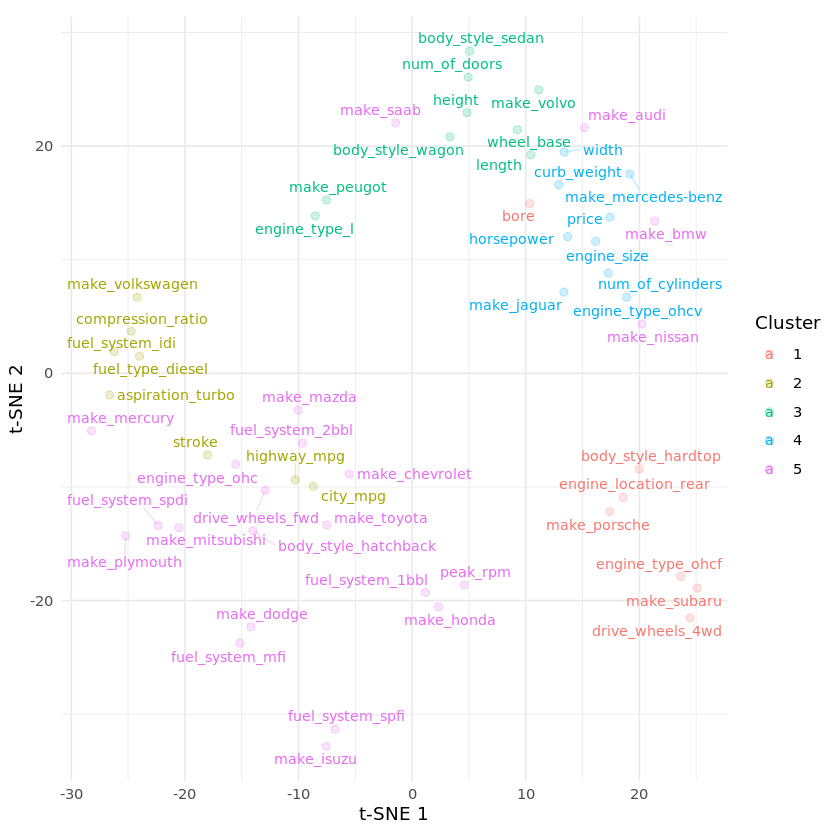

In [18]:
source("variable_grouping_util.R")

d <- read_csv("derived_data/mileage_prepped.csv", show_col_types = FALSE) %>%
  select(where(is.numeric)) %>%
  select(where(~ sd(., na.rm = TRUE) > 0)) %>%
  mutate(across(everything(), ~ (.-mean(., na.rm = TRUE)) / sd(., na.rm = TRUE)))

cov_mat <- cov(d, use = "pairwise.complete.obs")
cov_mat[!is.finite(cov_mat)] <- NA
keep <- rowSums(is.na(cov_mat)) == 0
cov_mat <- cov_mat[keep, keep, drop = FALSE]

stopifnot(ncol(cov_mat) == nrow(cov_mat))
colnames(cov_mat) <- colnames(d)[keep]
rownames(cov_mat) <- colnames(d)[keep]

res <- analyze_cov_tsne_spectral(cov_mat, tsne_perplexity = 5, k_groups = 5, seed = 42)
p_tsne <- plot_tsne_labels(res$tsne, res$clusters)
p_tsne

cluster_summary <- summarize_clusters(res$clusters)
cluster_summary

D <- res$distance
D_tbl <- as_tibble(D, .name_repair = "unique") %>%
  mutate(variable = rownames(D))
D_tbl

## Cross Validation and Other Notes
**What we've done so far:**
1. Take a data set
2. Encode it numerically
3. Examine correlations between variables
4. Perform regression
5. Report results

**Almost right - we need a train/test split:**  
1. Take a data set
2. Encode it numerically
3. **Split the data into a train and test set** 
3. Examine correlations between variables
4. Perform regression on the training data
5. Report results on the testing data

This may appear to be adequate. But **suppose we wish to compare two models**? (Pure ridge vs. pure lasso, tree based method vs. linear regression)

Seems easy: calculate the residual or the accuracy or whatever and then pick the better model?

The problem with this approach is that when we perform a train test split we have performed a random process and so our entire model is a sample from a distribution which varies over how we split our data. So for the same reason that we cannot just compare *means* of normal distributions we cannot compare the accuracy of two models without knowing the distribution of the two models' accuracies.

This is challenging because, in general, we do not have access to infinite data sets and so we cannot really perform independent experiments on our modeling.

Thus, people do the "next best" thing, which is cross validation.

The idea is simple enough:

[1] 1 2 1 5 5 2 3 5 1 4 5 3 1 4 1 3 3 2 4 4 2 2 2 5 4 3 5 4 1 1 5 3 4 3 3 2 5 4
[39] 5 2 4 1 1 4 2 3 5 3 2 1

fold,rmse
<dbl>,<dbl>
5,4.272170
8,3.313859
4,3.353581
3,4.028325
2,3.751791
1,3.678551
10,2.615065
9,3.735748
7,3.357006


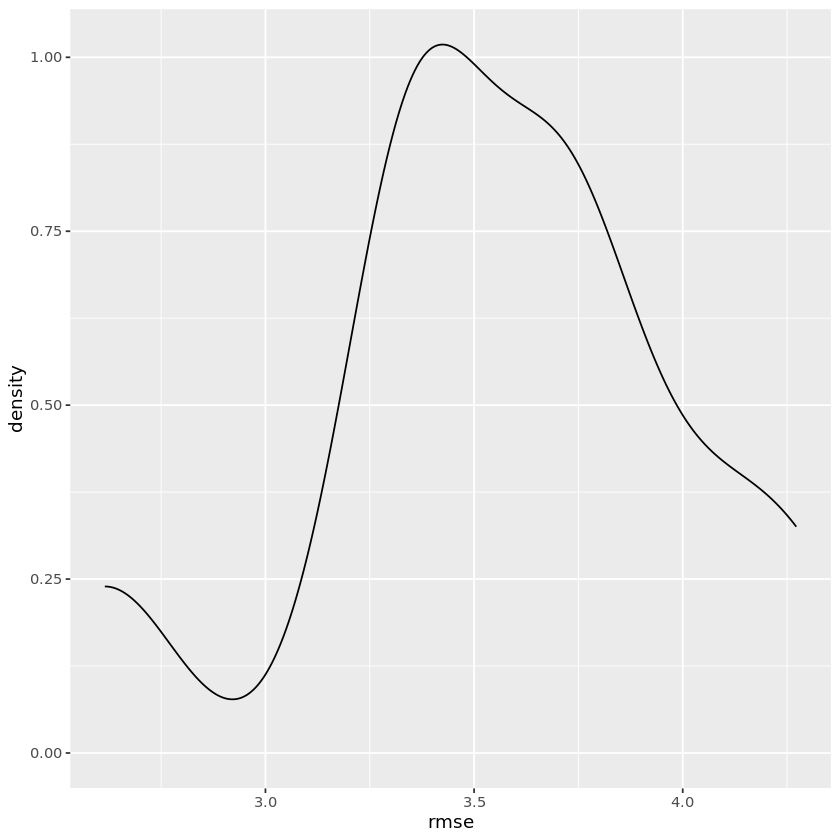

In [19]:
d <- read_csv("derived_data/mileage_prepped.csv", show_col_types=FALSE)

make_folds <- function(n_pts, n_folds=5){
    ((0:(n_pts-1) %% (n_folds)) + 1) %>% 
    sample(n_pts, replace=F)
}

make_folds(50,5)

on_folds <- function(k, d, f){
    folds <- make_folds(nrow(d), k);
    od <- tibble();
    for(i in unique(folds)){
        train <- d %>% filter(folds!=i)
        test <- d %>% filter(folds==i)
        od <- rbind(od, f(train, test, i))
    }
    od
}

f <- highway_mpg ~ curb_weight + length + width + height + num_of_cylinders + stroke + peak_rpm 

one <- function(train, test, fold_ii){
    m <- lm(f, data=train)
    p <- predict(m, newdata=test)
    r <- (sum((p-test$highway_mpg)^2)/nrow(test)) %>% sqrt()
    tibble(fold=fold_ii, rmse=r)
}

r <- on_folds(10, d, one)
r

ggplot(r,aes(rmse))+geom_density()

## Making Sense of K-Folds CV

The main consideration when doing k-fold cross validation is the understanding
that we aren't really generating new samples when we do it.

For each held out fold we are using *many* of the same data points to calculate our models while our smaller held out folds contain few points. Thus we expect the results to depend somewhat sensitively on the particular points held out, and we expect a higher variance than if we could sample from the same distribution over and over.

In practice, the consensus seems to be to use between 5-10 folds and this seems to be based on numerical testing. See [this paper](https://ai.stanford.edu/~ronnyk/accEst.pdf) by Kohavi, for instance.

In order to make sense of  what we might use this for, we should have some
models to compare, so let's take a look at tree based regression/classification next.

## Making Sense of Variable Effect

The other major way we want to evaluate a model is by understanding how each 
variable changes the possible outcome. There are a few ways to do this, but
the most informative is to plot the way the prediction changes as we change 
each variable (or combination of variables).

For this purpose we just use the training data set, since we want to study
how the model works, not so much how it performs on other data. 

This is pointless unless we add interaction terms: 

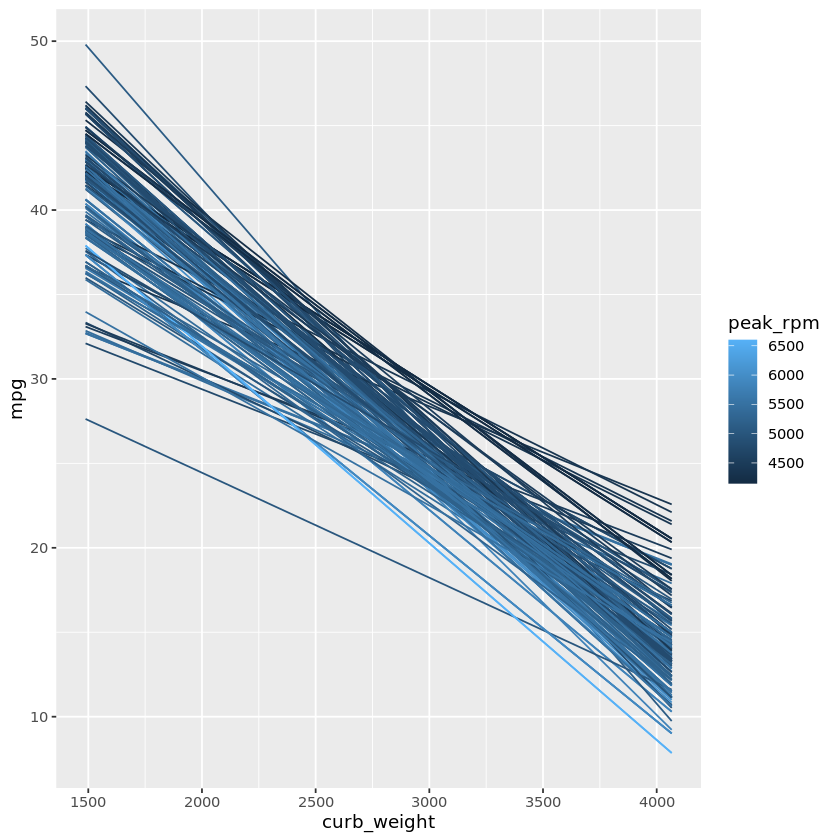

In [20]:
g <- highway_mpg ~ curb_weight + length + width + height + num_of_cylinders + stroke + peak_rpm + peak_rpm * curb_weight + curb_weight * width + width * height
model <- lm(g, data=d)


curb_weights <- seq(from=min(d$curb_weight), to=max(d$curb_weight), length.out=100)


all_cws <- tibble()
for(cw in curb_weights){
  faux <- d %>% mutate(curb_weight=cw)
  mpgs <- predict(model, newdata=faux)
  all_cws <- rbind(all_cws,tibble(point=1:length(mpgs), mpg=mpgs, curb_weight=cw, peak_rpm=faux$peak_rpm))
}

ggplot(all_cws, aes(curb_weight, mpg)) + geom_line(aes(group=point, color=peak_rpm))

This will be much more interesting when we look at tree based regression/classification.

## Tree Based Methods
### Motivating Ideas
The idea of decision trees is thus: given some independent variables
and a dependent variable we pose a series of questions about the independent
variables and this chops our data set up into smaller pieces for which the
problem might be easier to solve. 

If our data set looks like this:

In [21]:
d <- read_csv("source_data/power_grid_characters.csv", show_col_types = FALSE) %>%
  inner_join(read_csv("source_data/power_grid_character_genders.csv", show_col_types = FALSE),
             by=c("character_name","url")) %>%
  filter(gender %in% c("Male","Female")) %>%
  filter(complete.cases(.)) %>%
  pivot_wider(id_cols=c("character_name", "url", "gender"),names_from=power_category, values_from=numeric_level,
              values_fn = max,
              values_fill=2) %>%
  select(-url) %>% group_by(gender) %>% sample_n(700) %>% ungroup()

# Hold out a test set after balancing genders
set.seed(42)
d <- d %>% mutate(.row_id = row_number())
d_train <- d %>% group_by(gender) %>% slice_sample(prop=0.8) %>% ungroup()
d_test  <- d %>% filter(!(.row_id %in% d_train$.row_id))

d

character_name,gender,intelligence,strength,speed,durability,energy projection,fighting skills,.row_id
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Makkari (Earth-616),Female,2,5,7,7,6,4,1
Sasha Martin (Earth-616),Female,2,6,2,3,5,2,2
Diabolique (Earth-616),Female,3,1,7,3,6,2,3
Sarah Stacy (Earth-616),Female,4,4,3,4,1,3,4
Angel Salvadore (Earth-616),Female,2,2,3,2,6,3,5
Dorma (Earth-616),Female,2,4,3,3,1,2,6
Felicia Hardy (Earth-616),Female,2,4,3,2,3,3,7
Illyana Rasputina (Earth-616),Female,4,2,7,3,6,4,8
Danielle Forte (Earth-616),Female,3,2,2,2,5,3,9


We might want to predict gender based on our power categories and thus attempt to determine whether there is a gender bias in the imaginations of your typical marvel writer.

**A real dumb way** to do this would be to write a function which picks one column and then finds a point to split the data numerically which maximizes the gender split of the two resulting sets.

In [22]:
gini <- function(s){
  p <- sum(s==s[1])/length(s)
  2*p*(1-p)
}

find_split <- function(df, d_column, i_column){
  # Extract response and predictor
  y <- df[[d_column]]
  x <- df[[i_column]]
  
  # Ensure y has exactly two levels
  levs <- unique(y)
  stopifnot(length(levs) == 2)
  
  # Convert y to logical (TRUE = first level)
  y01 <- as.integer(y == levs[1])
  
  # Sort by the numeric feature
  ord <- order(x)
  y01 <- y01[ord]
  x <- x[ord]
  
  # Candidate split points: midpoints where class changes
  idx <- which(y01[-1] != y01[-length(y01)])
  split_points <- (x[idx] + x[idx + 1]) / 2

  n <- length(y01)
  best_gain <- -Inf
  best_split <- NA
  
  # Parent impurity
  p <- mean(y01 == 1)
  g_parent <- 2 * p * (1 - p)
  
  for (s in split_points) {
    left <- y01[x <= s]
    right <- y01[x > s]
    
    p_left <- mean(left == 1)
    p_right <- mean(right == 1)
    
    g_left <- 2 * p_left * (1 - p_left)
    g_right <- 2 * p_right * (1 - p_right)
    
    g_weighted <- (length(left) * g_left + length(right) * g_right) / n
    gain <- g_parent - g_weighted
    
    if (!is.na(gain) && gain > best_gain) {
                           best_gain <- gain
                           best_split <- s
                           }
  }
  
  tibble(
    column = i_column,
    best_split = best_split,
    gain = best_gain,
    class_levels = list(levs)
  )
}

find_split(d, "gender", "intelligence")

column,best_split,gain,class_levels
<chr>,<dbl>,<dbl>,<list>
intelligence,4,0.01204895,"Female, Male"


Using this split we can break our characters into two sets:

In [23]:
split <- find_split(d, "gender", "intelligence")
split

d %>% filter(intelligence <= split$best_split) %>% summarise(p_male=sum(gender=="Male")/length(gender),
                                                                          p_female=sum(gender=="Female")/length(gender))

d %>% filter(intelligence > split$best_split) %>% summarise(p_male=sum(gender=="Male")/length(gender),
                                                                  p_female=sum(gender=="Female")/length(gender))

column,best_split,gain,class_levels
<chr>,<dbl>,<dbl>,<list>
intelligence,4,0.01204895,"Female, Male"


p_male,p_female
<dbl>,<dbl>
0.4727127,0.5272873


p_male,p_female
<dbl>,<dbl>
0.7207792,0.2792208


We can turn this into a classifier easily enough: if intelligence is less than or equal to 4, then the probability that our character is male is 0.75. If the intelligence of our character is greater than 4 then the probability goes up to 0.87.

### Going Further
Suppose we wanted to improve our classifier further? Nothing prevents us from splitting our two resulting sets again using another column from our data set.

In [24]:
# First split on intelligence
s_int <- find_split(d, "gender", "intelligence")$best_split
left  <- d %>% filter(intelligence <= s_int)
right <- d %>% filter(intelligence >  s_int)

# Learn strength split separately in each chiln
s_str_L <- find_split(left,  "gender", "strength")$best_split
s_str_R <- find_split(right, "gender", "strength")$best_split

# Report male/female probs for the four leaves
sprintf("### less intelligent than/= %d, weaker than/= %d", s_int, s_str_L)
left  %>% filter(strength <= s_str_L) %>% summarise(p_male = mean(gender=="Male"),   p_female = mean(gender=="Female"))
sprintf("### less intelligent than/= %d, stronger than %d", s_int, s_str_L)
left  %>% filter(strength >  s_str_L) %>% summarise(p_male = mean(gender=="Male"),   p_female = mean(gender=="Female"))
sprintf("### smarter than %d, weaker than/= %d", s_int, s_str_R)
right %>% filter(strength <= s_str_R) %>% summarise(p_male = mean(gender=="Male"),   p_female = mean(gender=="Female"))
sprintf("### smarter than %d, stronger than %d", s_int, s_str_R)
right %>% filter(strength >  s_str_R) %>% summarise(p_male = mean(gender=="Male"),   p_female = mean(gender=="Female"))

[1] "### less intelligent than/= 4, weaker than/= 5"

p_male,p_female
<dbl>,<dbl>
0.4535902,0.5464098


[1] "### less intelligent than/= 4, stronger than 5"

p_male,p_female
<dbl>,<dbl>
0.6826923,0.3173077


[1] "### smarter than 4, weaker than/= 2"

p_male,p_female
<dbl>,<dbl>
0.6530612,0.3469388


[1] "### smarter than 4, stronger than 2"

p_male,p_female
<dbl>,<dbl>
0.752381,0.247619


If we were performing a regression instead we could calculate the variance of each sub-data set instead . You could imagine a more complicated procedure: for each step, pick the variable which produces the best split and split the set at that point, then repeat that process for each sub-data set until you hit a desired tree depth or you hit a given threshold of homogeneity in each sub-tree.

Since we are dealing with just two variables we should be able to make this substantially more enlightening.

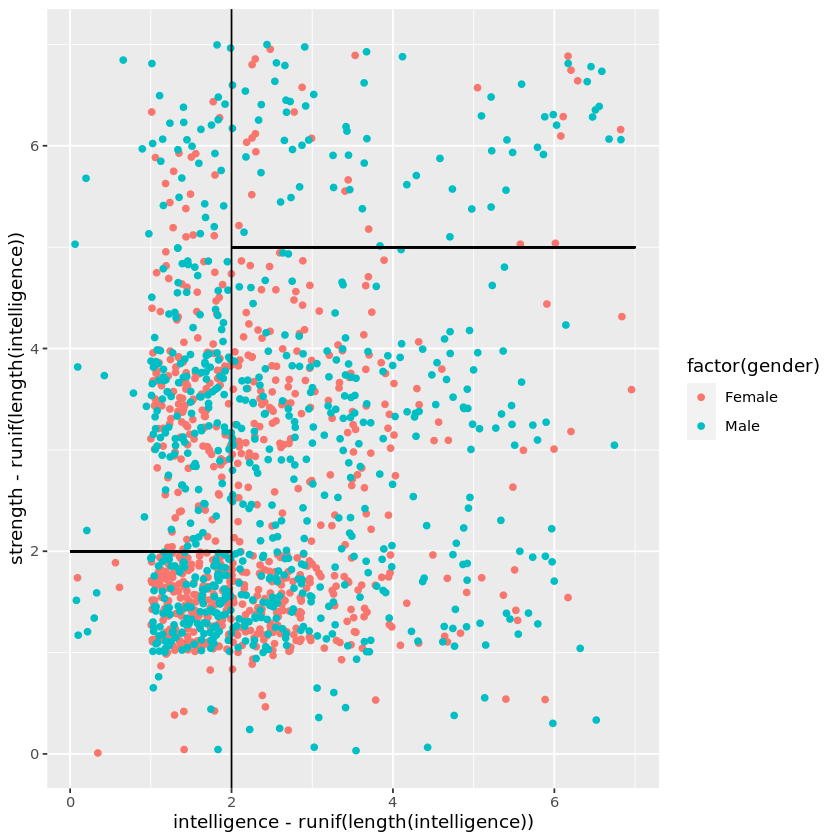

In [25]:
ggplot(d, aes(intelligence - runif(length(intelligence)), 
               strength - runif(length(intelligence)))) + 
    geom_point(aes(color=factor(gender))) + 
    geom_vline(xintercept=2) + 
    geom_segment(x=0,y=2,xend=2,yend=2) + 
    geom_segment(x=2,y=5,xend=7,yend=5)

This is the fundamental idea behind all the latest and greatest tree based procedures, including one we will demo next.

False Positive Rate,True Positive Rate,threshold
<dbl>,<dbl>,<dbl>
1.00000000,1.0000000,-Inf
1.00000000,1.0000000,0.4158004
0.47857143,0.6214286,0.5260116
0.07142857,0.1714286,0.6578947
0.04285714,0.1214286,0.7560976
0.00000000,0.0000000,Inf


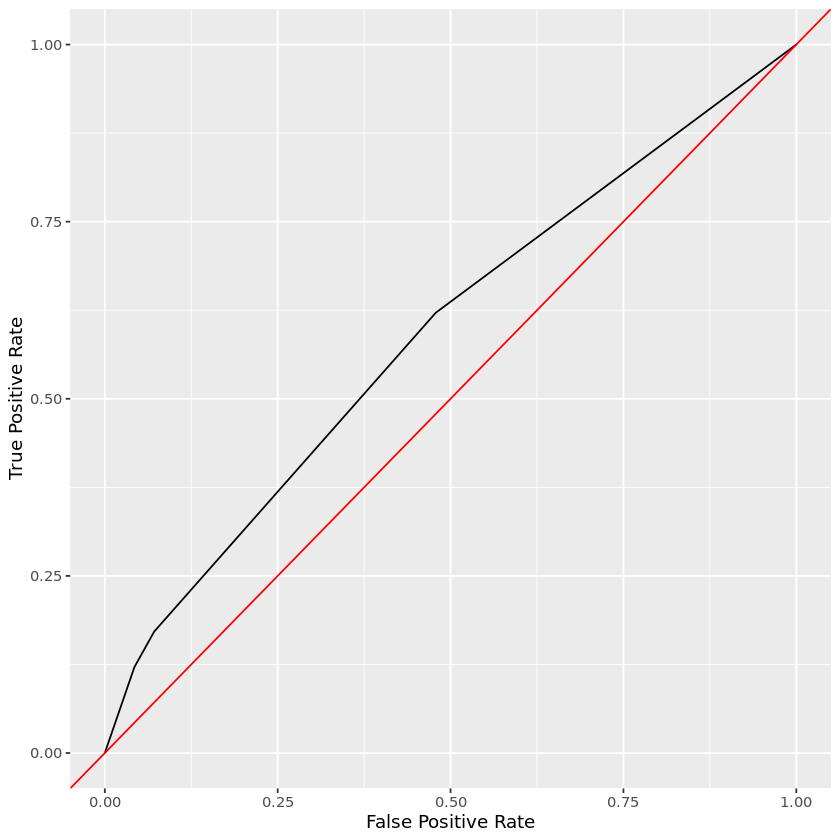

In [26]:
# Treat the partitioning as a classifier and plot an ROC on the held-out test set

# Learn the splits on the training data
s_int_tr <- find_split(d_train, "gender", "intelligence")$best_split
left_tr  <- d_train %>% filter(intelligence <= s_int_tr)
right_tr <- d_train %>% filter(intelligence >  s_int_tr)

s_str_L_tr <- find_split(left_tr,  "gender", "strength")$best_split
s_str_R_tr <- find_split(right_tr, "gender", "strength")$best_split

# Leaf probabilities P(Male)
p_LL <- left_tr  %>% filter(strength <= s_str_L_tr) %>% summarise(p=mean(gender=="Male")) %>% pull(p)
p_LR <- left_tr  %>% filter(strength >  s_str_L_tr) %>% summarise(p=mean(gender=="Male")) %>% pull(p)
p_RL <- right_tr %>% filter(strength <= s_str_R_tr) %>% summarise(p=mean(gender=="Male")) %>% pull(p)
p_RR <- right_tr %>% filter(strength >  s_str_R_tr) %>% summarise(p=mean(gender=="Male")) %>% pull(p)

# Score the test set using the learned tree
score_leaf <- function(x_int, x_str){
  if(x_int <= s_int_tr){
    if(x_str <= s_str_L_tr) return(p_LL) else return(p_LR)
  } else {
    if(x_str <= s_str_R_tr) return(p_RL) else return(p_RR)
  }
}

d_scored <- d_test %>%
  mutate(score = mapply(score_leaf, intelligence, strength),
         y = as.integer(gender=="Male"))

# Hand-written ROC from the scores
ths <- sort(unique(d_scored$score), decreasing=TRUE)
ths <- c(Inf, ths, -Inf)

roc <- map_dfr(ths, function(t){
  pred <- as.integer(d_scored$score >= t)
  tp <- sum(pred==1 & d_scored$y==1)
  fp <- sum(pred==1 & d_scored$y==0)
  tn <- sum(pred==0 & d_scored$y==0)
  fn <- sum(pred==0 & d_scored$y==1)
  tibble(`False Positive Rate` = fp/(fp+tn),
         `True Positive Rate`  = tp/(tp+fn),
         threshold = t)
}) %>% arrange(threshold)

roc
ggplot(roc, aes(`False Positive Rate`, `True Positive Rate`)) +
       geom_line() +
       geom_abline(slope=1, intercept=0, color="red")

## Adaboost
The `gbm` package implements a method called
[AdaBoost](https://en.wikipedia.org/wiki/AdaBoost) which uses a
tree-based method as its basic component, but its worth talking about
the details.

### Random Forests

You may have noticed that classification trees chunk up space into discrete regions and then the classification is performed in each region.

This is a bit like a k-nearest neighbor classification, where you just grab k neighbors of a point and they vote on which class they belong in. But such a tesselation of the input space introduces a rigidity to the classifier: a given point is or is not in the region in question and that region predicts the result in its entirity. You could see how this might make decisions for points near the boundary of regions more error prone.

The idea of a random forest is to exchange one potentially deep tree for many, independent, trees, trained on bootstrapped or samples with random feature subsets.

Then all the trees "vote" on a given point when you want to classify it. You can think of this as performing many different tesselations of the space and averaging out their contribution to a single point.

Given that you know how to choose an ideal split, which means you know how to train a specific sub-tree, you too could implement a random forest fitter.


### Adaboost

In adaboost we instead take the following tact:

1. Train a small model, limited parameters and depth.
2. Evaluate it on the training data, finding those points which the model does not accurately predict
3. Train a new small model with those points weighed as more important
4. Repeat until we have a set number of trees

Finally, the trees all vote on the result when new data is presented, except that their vote is weighted by their accuracy on the data.

Here is an example of using adaboost on our data set.

In [ ]:
suppressPackageStartupMessages(library(caret))
suppressPackageStartupMessages(library(gbm))

# Assumptions:
# - `d` exists as shown.
# - Binary gender classification desired; positive class set to "Male".
# - `lbdr()` exists in the environment (user-defined display helper).

# --- 1) Prep ------------------------------------------------------------------
# Keep only rows with non-missing gender and predictors

d <- read_csv("source_data/power_grid_characters.csv") %>%
  inner_join(read_csv("source_data/power_grid_character_genders.csv"),
             by=c("character_name","url")) %>%
  filter(gender %in% c("Male","Female")) %>%
  filter(complete.cases(.)) %>%
  pivot_wider(id_cols=c("character_name", "url", "gender"),names_from=power_category, values_from=numeric_level,
              values_fn = max,
              values_fill=2) %>%
  select(-url)

predictors <- c("intelligence","strength","speed","durability","energy projection","fighting skills")

d2 <- d %>%
  dplyr::filter(gender %in% c("Male","Female")) %>%
  drop_na(gender, all_of(predictors)) %>%
  mutate(
    gender = as.character(gender),
    # Binary target for AdaBoost in gbm: 0/1
    gender01 = as.integer(gender == "Male")
  )

idx <- createDataPartition(d2$gender01, p = 0.8, list = FALSE)
train <- d2[idx, ]
test  <- d2[-idx, ]

# --- 2) Fit GBM (AdaBoost) ----------------------------------------------------
gbm_fit <- gbm(
  formula = gender01 ~ intelligence + strength + speed + durability + `energy projection` + `fighting skills`,
  data = train,
  distribution = "adaboost",   # requires 0/1 target
  n.trees = 3000,
  interaction.depth = 3,
  shrinkage = 0.01,
  bag.fraction = 0.8,
  cv.folds = 5,
  train.fraction = 1.0,
  verbose = FALSE
)

best_iter <- gbm.perf(gbm_fit, method = "cv", plot.it = FALSE)

# Print informative variables (relative influence)
vi_tbl <- as_tibble(summary(gbm_fit, n.trees = best_iter, plotit = FALSE)) %>%
  rename(variable = var, rel_influence = rel.inf) %>%
  arrange(desc(rel_influence))
vi_tbl

Rows: 19148 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): power_category, character_name, url
dbl (1): numeric_level

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2985 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): character_name, url, gender

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
make_ice_plot <- function(feat, sample_n = 100, grid_n = 50) {
  # Grid over the feature's empirical range
  rng <- range(train[[feat]], na.rm = TRUE)
  grid_vals <- seq(rng[1], rng[2], length.out = grid_n)

  # Sample a subset of rows to keep plots readable
  base_rows <- train %>%
    dplyr::slice_sample(n = min(sample_n, nrow(train))) %>%
    dplyr::mutate(.id = dplyr::row_number())

  # Cross with grid and predict (handles non-syntactic names via tidy-eval)
  grid_tbl <- tibble::tibble(!!feat := grid_vals)

  newd <- base_rows %>%
    dplyr::select(dplyr::all_of(c("gender01", predictors, ".id"))) %>%
    dplyr::select(-dplyr::all_of(feat)) %>%
    tidyr::crossing(grid_tbl)

  newd$pred <- predict(gbm_fit, newdata = newd, n.trees = best_iter, type = "response")

  ggplot2::ggplot(newd, ggplot2::aes(x = .data[[feat]], y = .data[["pred"]], group = .data[[".id"]])) +
    ggplot2::geom_line(alpha = 0.25) +
    ggplot2::labs(
      title = paste("ICE:", feat),
      y = "P( Male )",
      x = feat
    ) +
    ggplot2::theme_minimal()
}

make_ice_plot("strength")
make_ice_plot("intelligence")
make_ice_plot("fighting skills")

In [ ]:
# Hand-written ROC on the held-out test set

# Predict probabilities for the positive class (Male)
test <- test %>% mutate(score = predict(gbm_fit, newdata = test, n.trees = best_iter, type = "response"),
                        y = as.integer(gender == "Male"))

# Compute ROC curve by sweeping thresholds over unique scores
ths <- test$score %>% unique() %>% sort(decreasing = TRUE)
ths <- c(Inf, ths, -Inf)

roc <- map_dfr(ths, function(t){
  pred <- as.integer(test$score >= t)
  tp <- sum(pred == 1 & test$y == 1)
  fp <- sum(pred == 1 & test$y == 0)
  tn <- sum(pred == 0 & test$y == 0)
  fn <- sum(pred == 0 & test$y == 1)
  tibble(`False Positive Rate` = fp/(fp + tn),
         `True Positive Rate`  = tp/(tp + fn),
         threshold = t)
}) %>% arrange(threshold)

roc
ggplot(roc, aes(`False Positive Rate`, `True Positive Rate`)) +
       geom_line() +
       geom_abline(slope = 1, intercept = 0, color = "red")

## Summary

### What We Did
- Encoded data and handled non-numeric variables
- Built basic classifiers and discussed performance metrics
- Explored linear models and regularization: 
- Covered model validation and reliability
- Learned tree-based ideas and simple splitting logic, then boosted trees

### Key Takeaways
- Always separate training and testing to measure generalization.
- Prefer threshold-free metrics (ROC/AUC) to compare classifiers.
- Regularization combats overfitting; cross validation compares models fairly.
- Trees partition feature space into interpretable regions; ensembles (boosting, forests) improve accuracy.

### Where To Go Next
- Try different tree depths and learning rates in adaboost and compare ROC curves.
- Combine cross validation with AUC to select models.
- Extend tree splits beyond two features and visualize higher-order effects.